### [그래프] Silver II 11725 트리의 부모 찾기

### 문제
루트 없는 트리가 주어진다. 이때, 트리의 루트를 1이라고 정했을 때, 각 노드의 부모를 구하는 프로그램을 작성하시오.

### 입력
첫째 줄에 노드의 개수 N (2 ≤ N ≤ 100,000)이 주어진다. 둘째 줄부터 N-1개의 줄에 트리 상에서 연결된 두 정점이 주어진다.

### 출력
첫째 줄부터 N-1개의 줄에 각 노드의 부모 노드 번호를 2번 노드부터 순서대로 출력한다.

### 입출력 예
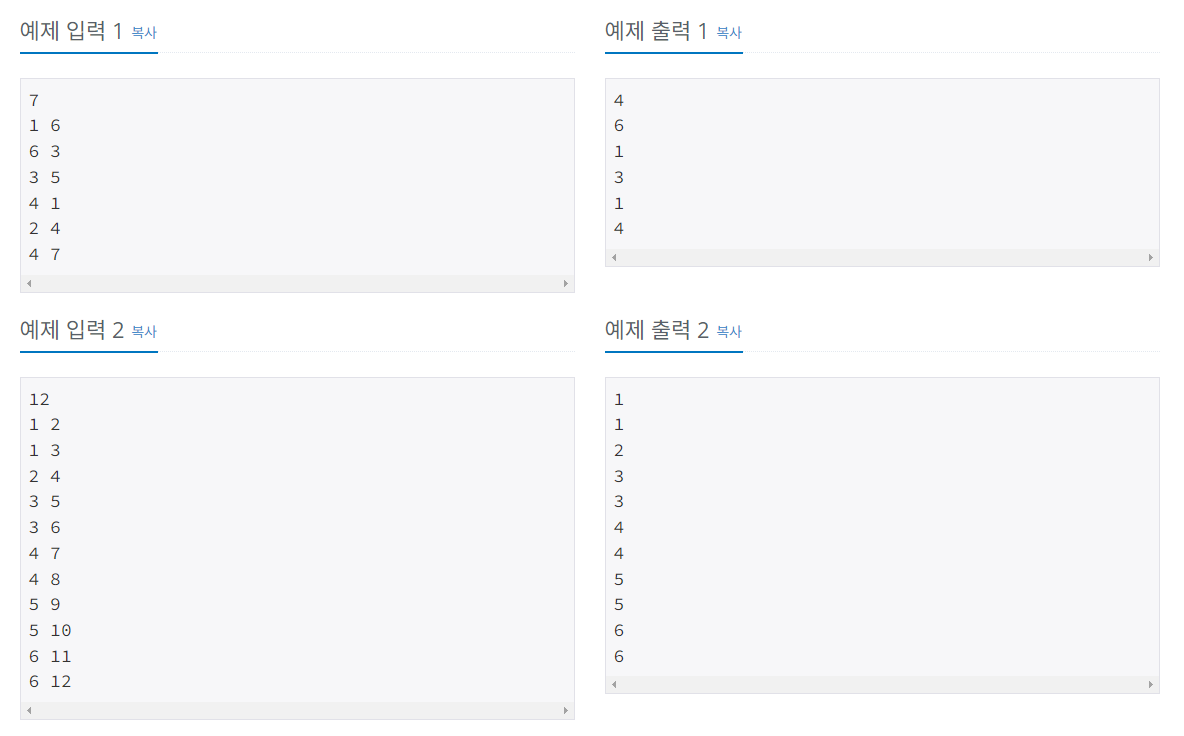

### 내 풀이 (재귀 없이 반복문으로만)

In [ ]:
def find_parents(n, edges):
    tree = [[] for _ in range(n+1)]  # 각 노드의 인접 리스트 그래프를 생성합
    parents = [0] * (n+1)  # 각 노드의 부모를 저장할 리스트를 초기화
    
    for a, b in edges:
        tree[a].append(b)  # 주어진 간선 정보를 바탕으로 인접 리스트 그래프를 생성
        tree[b].append(a)
    
    stack = [1]  # 스택을 준비하고 1번 노드를 시작으로 설정
    
    while stack:
        node = stack.pop()  # 스택에서 노드를 하나 꺼내기
        
        for neighbor in tree[node]:
            if parents[neighbor] == 0:  # 아직 부모 노드가 설정되지 않은 이웃 노드인 경우
                parents[neighbor] = node  # 현재 노드를 이웃 노드의 부모로 설정
                stack.append(neighbor)  # 이웃 노드를 스택에 추가하여 나중에 방문
    
    return parents[2:]  # 2번 노드부터 마지막 노드까지의 부모 리스트를 반환

n = int(input())  # 노드의 개수
edges = [tuple(map(int, input().split())) for _ in range(n-1)]  # 간선 정보

result = find_parents(n, edges)  

for parent in result:
    print(parent)  


### 지피티는 이렇게 풀더라(BFS)

In [2]:
import sys
from collections import deque

def find_parents(n, edges):
    # 각 노드의 인접 리스트 그래프를 만듭니다.
    graph = [[] for _ in range(n+1)]
    # 각 노드의 부모를 저장할 리스트를 초기화합니다.
    parents = [0] * (n+1)
    
    # 주어진 간선 정보를 바탕으로 인접 리스트 그래프를 생성합니다.
    for edge in edges:
        a, b = edge
        graph[a].append(b)
        graph[b].append(a)
    
    # BFS를 위한 큐를 생성하고, 1번 노드를 시작으로 방문 여부를 기록할 리스트를 초기화합니다.
    queue = deque([1])
    visited = [False] * (n+1)
    visited[1] = True
    
    # BFS를 수행합니다.
    while queue:
        node = queue.popleft()  # 큐에서 노드를 하나 꺼냅니다.
        
        for neighbor in graph[node]:
            if not visited[neighbor]:  # 아직 방문하지 않은 이웃 노드인 경우
                parents[neighbor] = node  # 현재 노드를 이웃 노드의 부모로 설정합니다.
                queue.append(neighbor)  # 이웃 노드를 큐에 추가하여 나중에 방문합니다.
                visited[neighbor] = True  # 이웃 노드를 방문했다고 표시합니다.
    
    # 부모 노드 리스트에서 2번 노드부터 마지막 노드까지를 반환합니다.
    return parents[2:]

# 입력을 받습니다.
n = int(input())  # 노드의 개수
edges = []  # 간선 정보를 저장할 리스트

for _ in range(n-1):
    a, b = map(int, input().split())
    edges.append((a, b))

# 문제에서 요구하는 대로 결과를 출력합니다.
result = find_parents(n, edges)
for parent in result:
    print(parent)


4
6
1
3
1
4


### 지피티는 이렇게 풀더라(DFS)

In [ ]:
import sys

sys.setrecursionlimit(10**6)  # 재귀 깊이 제한을 늘려줍니다.

def find_parents_dfs(node, graph, parents, visited):
    visited[node] = True  # 현재 노드를 방문했다고 표시합니다.
    
    for neighbor in graph[node]:
        if not visited[neighbor]:  # 아직 방문하지 않은 이웃 노드인 경우
            parents[neighbor] = node  # 현재 노드를 이웃 노드의 부모로 설정합니다.
            find_parents_dfs(neighbor, graph, parents, visited)  # 이웃 노드에서 DFS 재귀 호출합니다.

n = int(input())  # 노드의 개수
edges = []  # 간선 정보를 저장할 리스트

for _ in range(n-1):
    a, b = map(int, input().split())
    edges.append((a, b))

# 각 노드의 인접 리스트 그래프를 만듭니다.
graph = [[] for _ in range(n+1)]
for edge in edges:
    a, b = edge
    graph[a].append(b)
    graph[b].append(a)

parents = [0] * (n+1)  # 각 노드의 부모를 저장할 리스트를 초기화합니다.
visited = [False] * (n+1)  # 방문 여부를 기록할 리스트를 초기화합니다.

# 1번 노드부터 DFS를 시작합니다.
find_parents_dfs(1, graph, parents, visited)

# 2번 노드부터 마지막 노드까지의 부모 노드를 출력합니다.
for parent in parents[2:]:
    print(parent)
